In [1]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Import Data

In [2]:
data = pd.read_csv("../../data/clean/KingCountyHousingData.csv", index_col = 0)
#real_property_sales = pd.read_csv("../../data/raw/EXTR_RPSale.csv", encoding='latin-1', low_memory=False)
#residential_building = pd.read_csv("../../data/raw/EXTR_ResBldg.csv", encoding='latin-1', low_memory=False)

## Clean Data and Filter For Needed Info

In [3]:
data.head()

,Major,Minor,PropType,SqFtLot,SalePrice,DocumentDate,NbrLivingUnits,SqFtTotLiving,Has_Porch,Nuisances,WaterFrontLocation,Is_WaterFrontLocation,Has_Nuisance
0,278732,710,R,7416,395000,2019-03-20,1,1820,0,No Nuisances,None,0,0
1,807841,410,R,7424,847888,2019-08-16,1,2200,0,No Nuisances,None,0,0
2,755080,15,R,5000,819000,2019-10-12,1,1800,1,No Nuisances,None,0,0
3,229670,160,R,9853,730000,2019-07-21,1,2410,1,No Nuisances,None,0,0
4,513763,80,R,5239,612000,2019-03-01,1,2798,1,No Nuisances,None,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28824 entries, 0 to 28823
Data columns (total 13 columns):
Major                    28824 non-null int64
Minor                    28824 non-null int64
PropType                 28824 non-null object
SqFtLot                  28824 non-null int64
SalePrice                28824 non-null int64
DocumentDate             28824 non-null object
NbrLivingUnits           28824 non-null int64
SqFtTotLiving            28824 non-null int64
Has_Porch                28824 non-null int64
Nuisances                28824 non-null object
WaterFrontLocation       28824 non-null object
Is_WaterFrontLocation    28824 non-null int64
Has_Nuisance             28824 non-null int64
dtypes: int64(9), object(4)
memory usage: 3.1+ MB


In [5]:
df = data.sort_values('Major')
df

,Major,Minor,PropType,SqFtLot,SalePrice,DocumentDate,NbrLivingUnits,SqFtTotLiving,Has_Porch,Nuisances,WaterFrontLocation,Is_WaterFrontLocation,Has_Nuisance
7414,100,67,R,17400,358308,2019-03-18,1,2240,1,No Nuisances,None,0,0
7413,100,67,R,17400,310800,2019-04-01,1,2240,1,No Nuisances,None,0,0
15453,100,42,R,6002,485500,2019-10-29,1,2134,1,No Nuisances,None,0,0
2114,100,66,R,14500,339000,2019-10-22,1,1200,1,No Nuisances,None,0,0
2529,120,8,R,24142,850000,2019-05-17,1,3500,0,No Nuisances,None,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,989000,70,R,25060,3125000,2019-02-01,1,1090,1,Traffic Noise,None,0,1
13168,989920,30,R,14144,245000,2019-01-29,1,1560,0,No Nuisances,None,0,0
20093,990000,35,R,8040,435000,2019-07-24,1,790,1,No Nuisances,None,0,0
2375,990000,470,R,6182,1275000,2019-06-06,1,3830,1,Traffic Noise,None,0,1


In [6]:
# Check x if have the relevant data to answer question
# [x]Higher square footage increases home sale price1, 2
# [x]Having a porch increases home sale price3, 4
# [x]Having a beachfront or lakefront increases home sale price5
# [x]The house filling a higher proportion of the overall lot decreases home sale price6
# [x]The cost per square foot is lower in duplexes than in single-family homes7
# [x]The presence of a nuisance (power lines, traffic noise, airport noise) decreases home sale price1, 5

In [7]:
df.sort_values('SqFtTotLiving')

,Major,Minor,PropType,SqFtLot,SalePrice,DocumentDate,NbrLivingUnits,SqFtTotLiving,Has_Porch,Nuisances,WaterFrontLocation,Is_WaterFrontLocation,Has_Nuisance
8417,614205,10,R,7802,760971,2019-12-10,1,2,0,No Nuisances,None,0,0
2073,145360,441,R,10800,735000,2019-03-22,1,250,0,Traffic Noise,None,0,1
13945,156010,50,R,6850,742500,2019-06-25,1,250,0,Traffic Noise,None,0,1
15270,611750,1205,R,19134,680000,2019-05-24,1,260,0,No Nuisances,None,0,0
28335,276760,2770,R,955,1030000,2019-05-02,1,280,0,No Nuisances,None,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27858,22506,9015,R,176418,3798000,2019-03-19,1,8090,1,No Nuisances,None,0,0
11092,92506,9188,R,35200,2785000,2019-05-17,1,8230,1,No Nuisances,None,0,0
162,405451,40,R,50258,2818000,2019-04-22,1,8680,1,No Nuisances,Other lake,1,0
16189,519410,80,R,41509,2300000,2019-12-09,1,9968,1,No Nuisances,None,0,0


In [8]:
df_temp = df[['SalePrice', 'SqFtTotLiving']]
df_temp.sort_values('SqFtTotLiving')

,SalePrice,SqFtTotLiving
8417,760971,2
2073,735000,250
13945,742500,250
15270,680000,260
28335,1030000,280
...,...,...
27858,3798000,8090
11092,2785000,8230
162,2818000,8680
16189,2300000,9968


In [9]:
df_temp.sort_values('SalePrice')

,SalePrice,SqFtTotLiving
15315,70000,1360
13880,70000,910
1321,72000,1130
11436,72771,1024
6704,73066,2490
...,...,...
5884,3800000,4590
12687,3800000,1430
16549,3800000,1430
13649,3800000,1270


## Graphical EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fb3bc7c88>]],
      dtype=object)

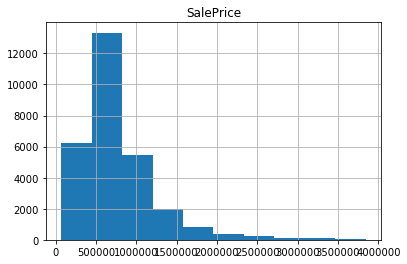

In [10]:
df.hist('SalePrice')

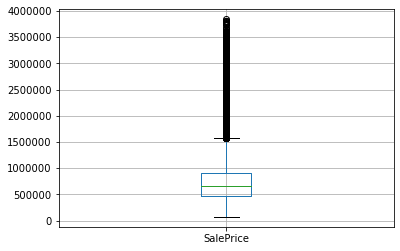

In [11]:
df.boxplot('SalePrice')

In [12]:
# What are the 10 most expensive listings?
df['SalePrice'].sort_values().tail(10)

21507    3750000
2524     3778950
25692    3778950
27858    3798000
7532     3800000
5884     3800000
12687    3800000
16549    3800000
13649    3800000
13677    3842000
Name: SalePrice, dtype: int64

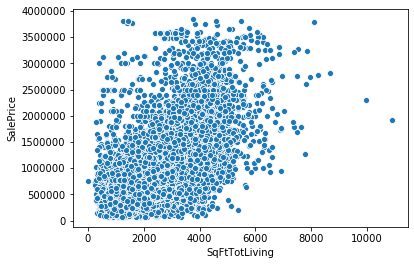

In [13]:
sns.scatterplot(df['SqFtTotLiving'], df['SalePrice'])
#plt.axis([0,0.8e4,0,1e7])

In [14]:
# create a correlation matrix

df.corr()

,Major,Minor,SqFtLot,SalePrice,NbrLivingUnits,SqFtTotLiving,Has_Porch,Is_WaterFrontLocation,Has_Nuisance
Major,1.000000,-0.304353,-0.148297,-0.024193,-0.006461,-0.006321,0.033151,-0.022783,-0.058144
Minor,-0.304353,1.000000,0.397076,0.046643,0.000794,0.050714,0.002615,0.068665,0.087697
SqFtLot,-0.148297,0.397076,1.000000,0.071279,-0.018629,0.181251,0.045549,0.074345,0.022737
SalePrice,-0.024193,0.046643,0.071279,1.000000,0.023082,0.597788,0.206741,0.136056,0.006016
NbrLivingUnits,-0.006461,0.000794,-0.018629,0.023082,1.000000,0.036697,-0.003740,-0.000495,0.044467
SqFtTotLiving,-0.006321,0.050714,0.181251,0.597788,0.036697,1.000000,0.334515,0.040866,-0.087194
Has_Porch,0.033151,0.002615,0.045549,0.206741,-0.003740,0.334515,1.000000,0.012741,-0.045836
Is_WaterFrontLocation,-0.022783,0.068665,0.074345,0.136056,-0.000495,0.040866,0.012741,1.000000,0.001799
Has_Nuisance,-0.058144,0.087697,0.022737,0.006016,0.044467,-0.087194,-0.045836,0.001799,1.000000


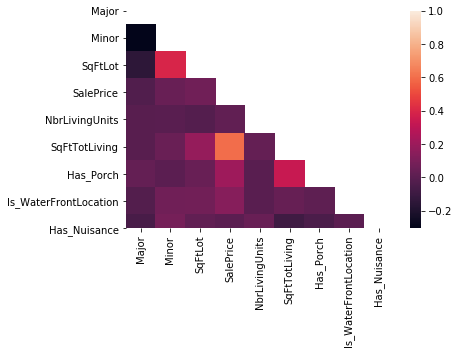

In [15]:
sns.heatmap(df.corr(), mask = np.triu(np.ones_like(df.corr(), dtype=np.bool)))

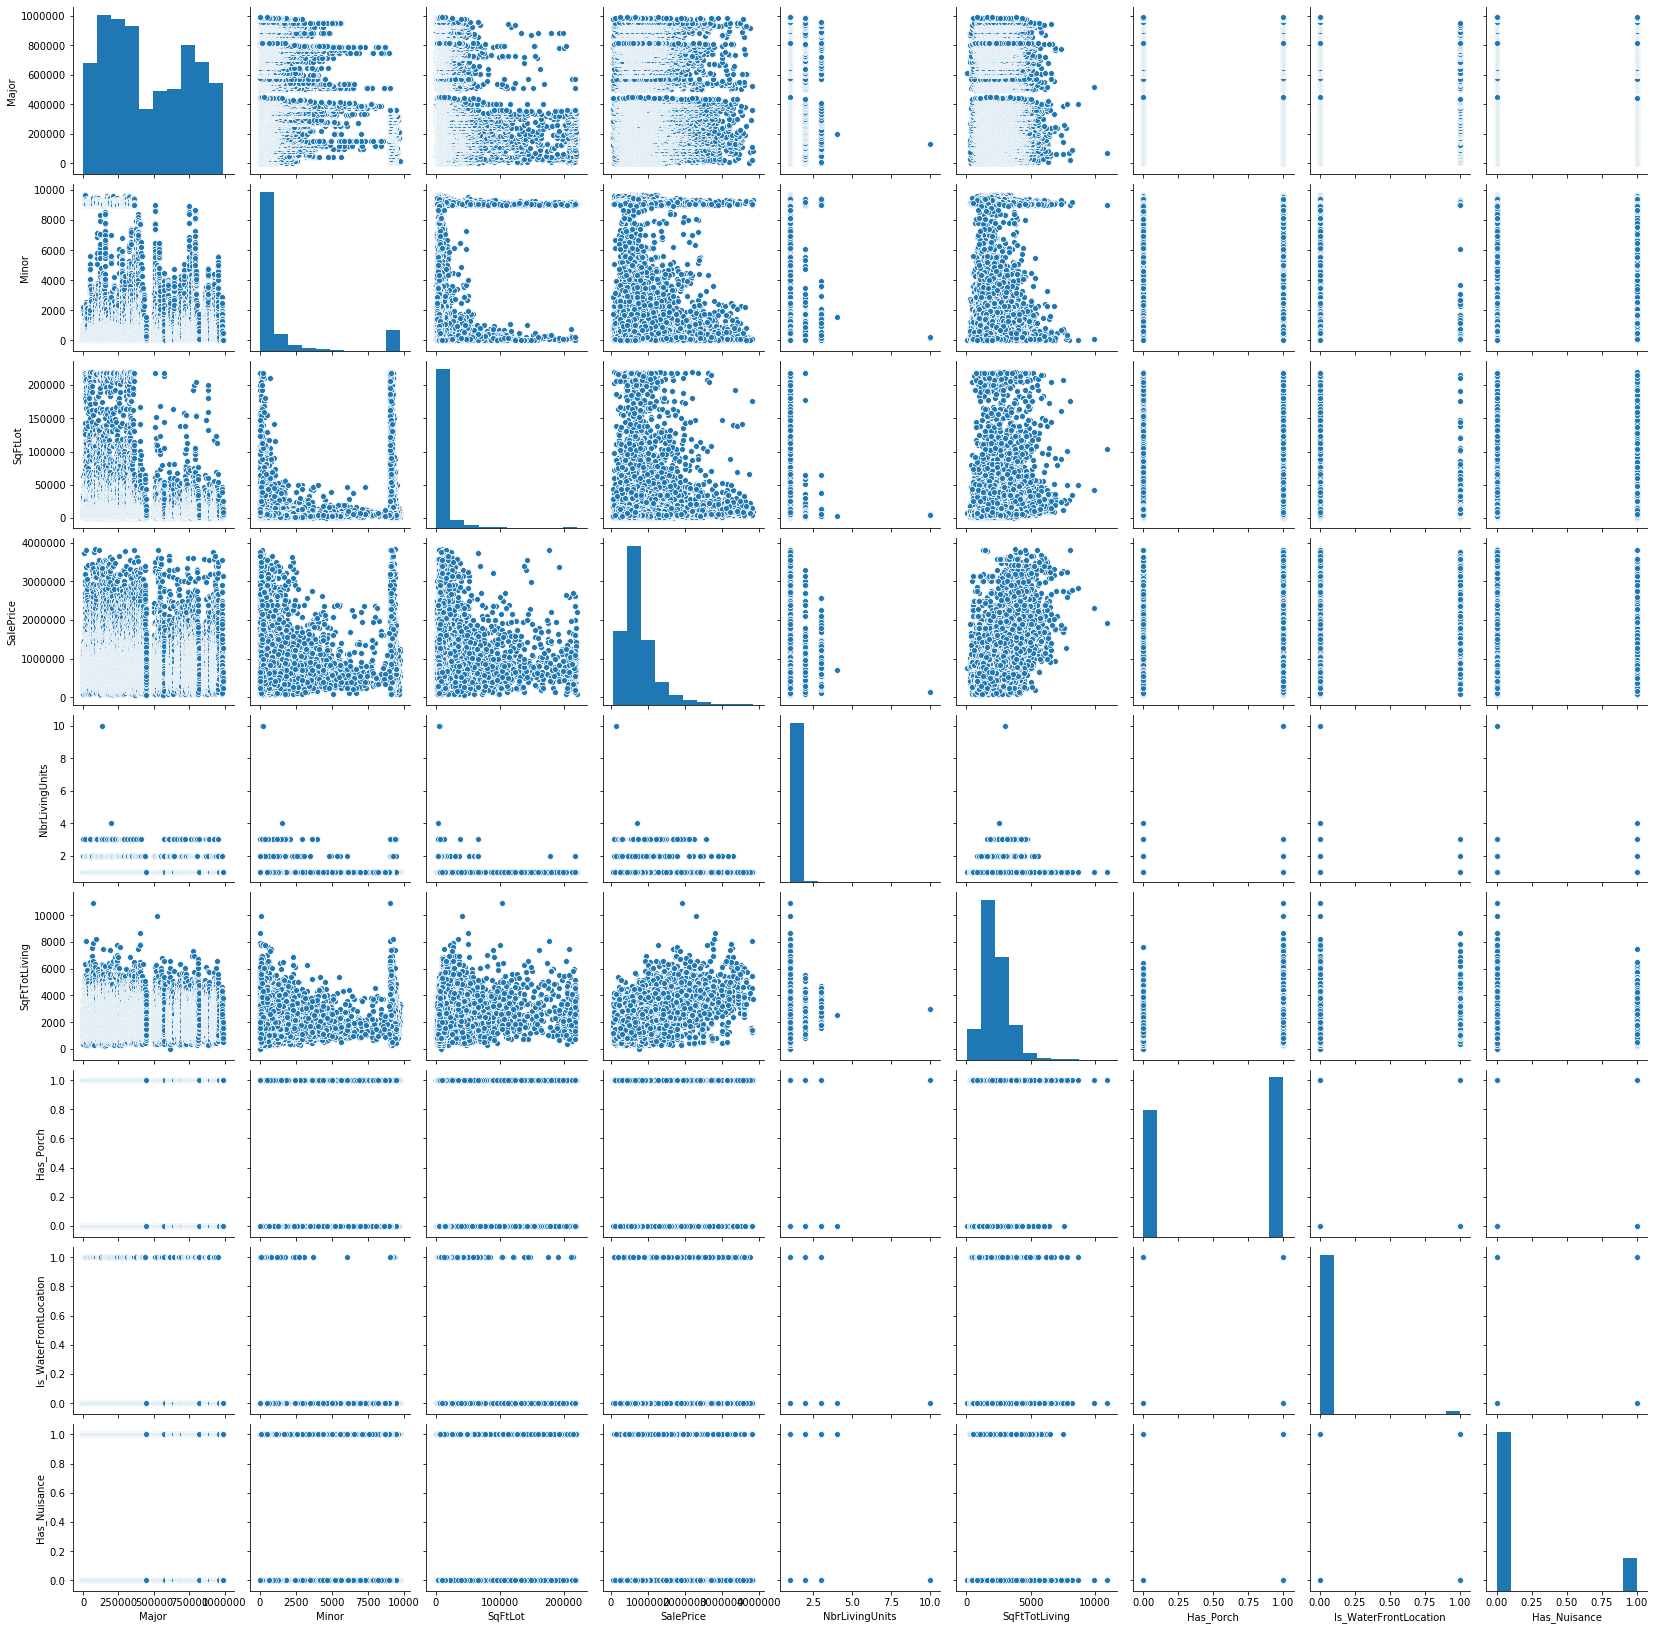

In [16]:
#sns.pairplot(df)

First Simple Model(FSM) with Statsmodels

In [17]:
# Create a dataframe with only the target and the chosen
# high-positive correlation feature
fsm_df = df[['SalePrice', 'SqFtTotLiving']]
fsm_df

,SalePrice,SqFtTotLiving
7414,358308,2240
7413,310800,2240
15453,485500,2134
2114,339000,1200
2529,850000,3500
...,...,...
2118,3125000,1090
13168,245000,1560
20093,435000,790
2375,1275000,3830


In [18]:
formula = "SalePrice ~ SqFtTotLiving"

In [19]:
fsm = ols(formula=formula, data=fsm_df).fit()

In [20]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                 1.603e+04
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:42:58   Log-Likelihood:            -4.1190e+05
No. Observations:               28824   AIC:                         8.238e+05
Df Residuals:                   28822   BIC:                         8.238e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.106e+05   5757.098     19.217      0.000    9.93e+04    1.22e+05
SqFtTotLiving   306.1794      2.419    126.597      0.000     301.439     310.920
==============================================================================
Omnibus:                    13104.282   Durbin-Watson:                   0.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           110455.449
Skew:                           1.996   Prob(JB):                         0.00
Kurtosis:                      11.720   Cond. No.                     5.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
rsquared = fsm.rsquared
params = fsm.params

print(f'Rsquared of FSM: {rsquared}')
print('----------')
print('Beta values of FSM:')
print(params)

Rsquared of FSM: 0.35735092179589356
----------
Beta values of FSM:
Intercept        110633.300485
SqFtTotLiving       306.179423
dtype: float64


### Check the assumptions of Linear Regression

In [22]:
# H_0 - Regression is linear
# H_A - Regression is non linear

In [23]:
from statsmodels.stats.diagnostic import linear_rainbow

linear_rainbow(fsm)

(1.1276678781251248, 2.806838434497479e-13)

p-value is close to 0, so regression is linear

### Normality

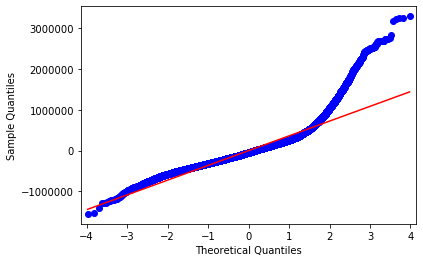

In [24]:
# Create a qq-plot

fsm_resids = fsm.resid

sm.qqplot(fsm_resids, line = 'r');

The null hypothesis is that the residuals are normally distributed, alternative hypothesis is that they are not. 
Not normally distributed

### Homoscadasticity

In [25]:
# Use the predict() method now available to be called from the fsm variable 
# to store the predictions
y_hat = fsm.predict()

Text(0.5, 0, 'y_hat')

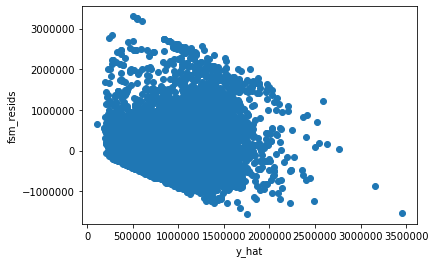

In [26]:
plt.scatter(y_hat, fsm_resids)
plt.ylabel('fsm_resids')
plt.xlabel('y_hat')

In [46]:
from statsmodels.stats.diagnostic import het_breuschpagan
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(fsm_resids, fsm_df[["SalePrice"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: nan
F-statistic p-value: 0.0


The null hypothesis is homoscedasticity, alternative hypothesis is heteroscedasticity.

P-value is 0, reject the null hyputhesis. Residuals are heteroscedastics.

### Train a model with sklearn

In [28]:
from sklearn.linear_model import LinearRegression

# instantiate a linear regression object 
lr = LinearRegression()

In [29]:
# split the data into target and features
y = np.array(df['SalePrice'])
X = np.array(df['SqFtTotLiving'])

In [30]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)
# Call .fit from the linear regression object, and feed X and y in as parameters
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
score = lr.score(X, y)
score

0.3573509217958938

In [32]:
beta = lr.coef_
intercept = lr.intercept_

print(beta)
print(intercept)

[[306.17942259]]
[110633.30048538]


# Model 2

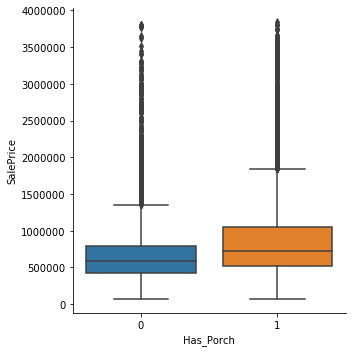

In [33]:
sns.catplot(x="Has_Porch", y="SalePrice", data = df, kind="box")
plt.figure(figsize = (30, 10))
plt.close(2); # closing the extra axis created by sns

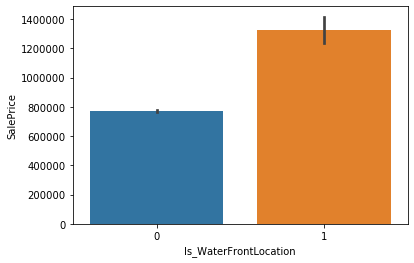

In [34]:
sns.barplot(df['Is_WaterFrontLocation'], df['SalePrice'])

In [35]:
# Create another dataframe containing our three features of interest
model_2_df = df[['SalePrice', 'SqFtTotLiving', 'Has_Porch']]
model_2_df

,SalePrice,SqFtTotLiving,Has_Porch
7414,358308,2240,1
7413,310800,2240,1
15453,485500,2134,1
2114,339000,1200,1
2529,850000,3500,0
...,...,...,...
2118,3125000,1090,1
13168,245000,1560,0
20093,435000,790,1
2375,1275000,3830,1


In [36]:
formula_2 = "SalePrice ~ SqFtTotLiving + Has_Porch"

In [37]:
model_2 = ols(formula=formula_2, data=model_2_df).fit()

In [38]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     8015.
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:43:47   Log-Likelihood:            -4.1190e+05
No. Observations:               28824   AIC:                         8.238e+05
Df Residuals:                   28821   BIC:                         8.238e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.093e+05   5819.840     18.787      0.000    9.79e+04    1.21e+05
SqFtTotLiving   304.8730      2.566    118.797      0.000     299.843     309.903
Has_Porch      7449.1257   4894.935      1.522      0.128   -2145.173     1.7e+04
==============================================================================
Omnibus:                    13102.884   Durbin-Watson:                   0.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           110379.446
Skew:                           1.996   Prob(JB):                         0.00
Kurtosis:                      11.716   Cond. No.                     6.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
linear_rainbow(model_2)

(1.1280109037098622, 2.4569556495045947e-13)

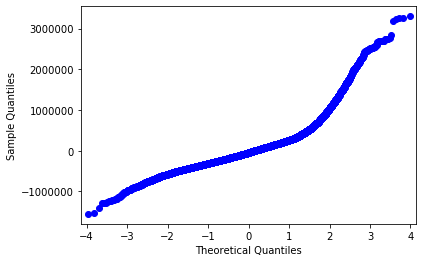

In [40]:
model_2_resids = model_2.resid

sm.qqplot(model_2_resids);

In [41]:
y_hat = model_2.predict()

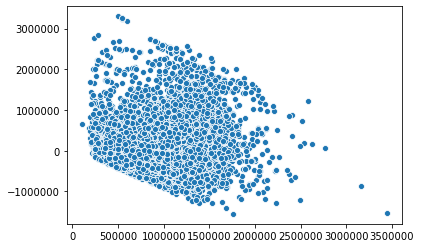

In [42]:
sns.scatterplot(y_hat, model_2_resids)

# Model 3

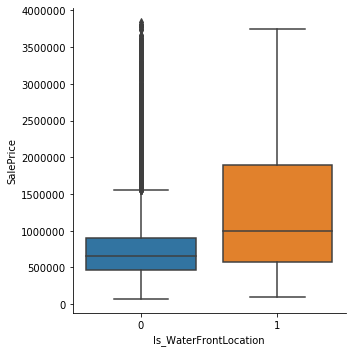

In [43]:
sns.catplot(x="Is_WaterFrontLocation", y="SalePrice", data = df, kind="box")
#sns.catplot(x="Is_WaterFrontLocation", y="SalePrice", data = df, kind="box")
plt.figure(figsize = (30, 10))
plt.close(2); # closing the extra axis created by sns

In [44]:
model_3_df = df[['SalePrice', 'SqFtTotLiving', 'Has_Porch', 'Is_WaterFrontLocation']]
model_3_df

,SalePrice,SqFtTotLiving,Has_Porch,Is_WaterFrontLocation
7414,358308,2240,1,0
7413,310800,2240,1,0
15453,485500,2134,1,0
2114,339000,1200,1,0
2529,850000,3500,0,0
...,...,...,...,...
2118,3125000,1090,1,0
13168,245000,1560,0,0
20093,435000,790,1,0
2375,1275000,3830,1,0


In [45]:
formula_3 = "SalePrice ~ SqFtTotLiving + Has_Porch + Is_WaterFrontLocation"
model_3 = ols(formula=formula_3, data=model_3_df).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5639.
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:44:00   Log-Likelihood:            -4.1162e+05
No. Observations:               28824   AIC:                         8.232e+05
Df Residuals:                   28820   BIC:                         8.233e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.079e+05   5763.462     18.716      0.000    9.66e+04    1.19e+05
SqFtTotLiving           302.5124      2.543    118.947      0.000     297.528     307.497
Has_Porch              7563.4853   4847.244      1.560      0.119   -1937.338    1.71e+04
Is_WaterFrontLocation  4.555e+05   1.91e+04     23.894      0.000    4.18e+05    4.93e+05
==============================================================================
Omnibus:                    12545.159   Durbin-Watson:                   0.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           102534.109
Skew:                           1.901   Prob(JB):                         0.00
Kurtosis:                      11.422   Cond. No.                     2.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""